In [5]:
import numpy as np 
import pandas as pd 

In [6]:
prices = pd.read_csv('../Datasets/laptops.csv',encoding='latin-1')

In [7]:
prices.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [8]:
prices.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [10]:
data_num = prices.select_dtypes(include = ["int64", "float64"])
data_num.columns.tolist()

['Unnamed: 0', 'Inches', 'Price_euros']

## Data Visualization

<Axes: xlabel='Price_euros', ylabel='Count'>

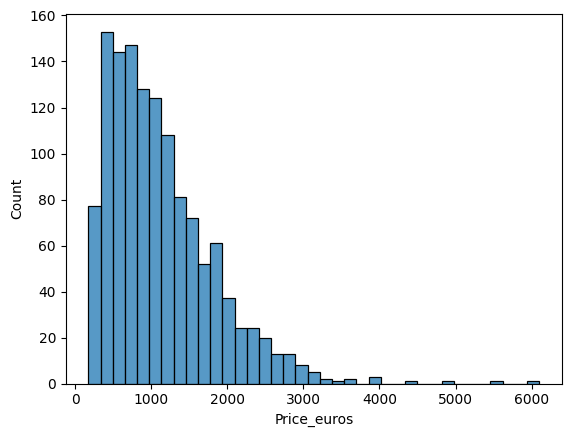

In [11]:
import seaborn as sns
sns.histplot(data = prices, x= "Price_euros")

<Axes: xlabel='Price_euros', ylabel='Count'>

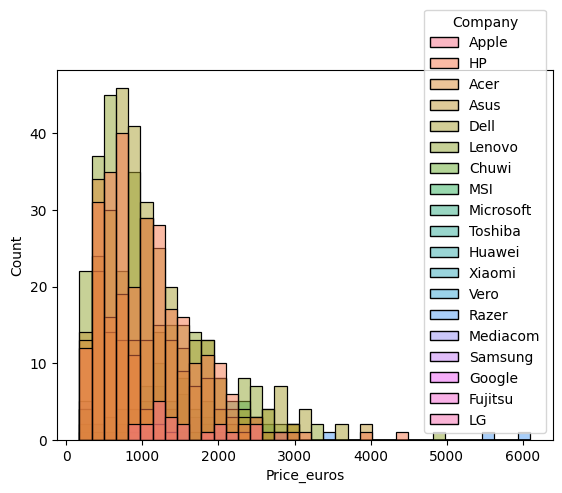

In [12]:
sns.histplot(x = "Price_euros", data = prices, hue = "Company")

In [13]:
prices['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [14]:
prices['Inches'].value_counts()

Inches
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64

In [15]:
# Эти фичи уникальны и никак не влияют на наши прогнозы, поэтому мы их удаляем
prices.drop(columns=['Unnamed: 0','Company','Inches','ScreenResolution','TypeName','Weight'],inplace=True)
prices.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,MacBook Pro,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Macbook Air,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,250 G6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,MacBook Pro,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,MacBook Pro,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [16]:
prices.reset_index(drop=True,inplace=True)

In [17]:
prices.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,MacBook Pro,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Macbook Air,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,250 G6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,MacBook Pro,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,MacBook Pro,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [18]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1303 non-null   object 
 1   Cpu          1303 non-null   object 
 2   Ram          1303 non-null   object 
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Price_euros  1303 non-null   float64
dtypes: float64(1), object(6)
memory usage: 71.4+ KB


In [19]:
col = [feature for feature in prices.columns if prices[feature].dtype == 'O']
col

['Product', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']

In [20]:
#  Мы присвоим каждому значению категориального признака номер. 
#  Номера будут присвоены в зависимости от того, сколько стоит целевой признак.
#  Мы сгруппируем набор данных по признаку. 
#  Затем вычислим среднее значение целевого признака («Цена в евро») для сгруппированных данных. 
#  Теперь отсортируем значения и получим индекс. 
#  Теперь создадим словарь и присвоим индексу значение от 0 до n.

for feature in col:
    labels_ordered= prices.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    prices[feature]=prices[feature].map(labels_ordered)

In [21]:
prices.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,559,85,3,13,80,8,1339.69
1,333,64,3,14,45,8,898.94
2,107,58,3,20,54,2,575.00
3,559,111,5,30,95,8,2537.45
4,559,99,3,20,84,8,1803.60


In [22]:
y = prices['Price_euros']
X = prices.drop(columns='Price_euros')

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data=scaler.fit_transform(X)
X=pd.DataFrame(data)

**Training and Testing Dataset Split**

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)

In [25]:
from sklearn import metrics

### Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() 

In [27]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
lr.score(X_train,y_train)

0.8281332998526307

In [29]:
lr.score(X_test,y_test)

0.8038766830240817

In [30]:
y_pred=lr.predict(X_test)

In [31]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 203.07117156106008
Residual Sum of Squares(MSE): 105398.98980682719
R2-Score: 0.8038766830240817


### Random Forest Regression 

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=1)

In [33]:
rfr.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
rfr.score(X_train,y_train)

0.9881639269757994

In [35]:
rfr.score(X_test,y_test)

0.9293357266268758

In [36]:
y_pred=rfr.predict(X_test)

In [37]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 110.585062017015
Residual Sum of Squares(MSE): 37975.81615385019
R2-Score: 0.9293357266268758


### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [39]:
y_pred =dtr.predict(X_test)

In [40]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 125.84238752556237
Residual Sum of Squares(MSE): 50063.21849743524
R2-Score: 0.906843846528298


### Lasso Regression

In [69]:
from sklearn import linear_model
lasso= linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [70]:
y_pred=lasso.predict(X_test)

In [71]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 203.0516880347077
Residual Sum of Squares(MSE): 105430.00122860668
R2-Score: 0.8038189778893865


### Ridge Regression

In [44]:
from sklearn import linear_model
ridge= linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [45]:
y_pred =ridge.predict(X_test)

In [46]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 203.0657636005696
Residual Sum of Squares(MSE): 105400.059114391
R2-Score: 0.8038746932882535


### XgBoost Regressor 

In [47]:
from xgboost.sklearn import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [48]:
y_pred=xgb.predict(X_test)

In [49]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 119.61554045320287
Residual Sum of Squares(MSE): 43719.40165554538
R2-Score: 0.9186482329232665


### Gradient Boosting Regressor 

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [51]:
y_pred = gb.predict(X_test)

In [52]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 113.48548756101461
Residual Sum of Squares(MSE): 35694.72943066479
R2-Score: 0.9335803052066212


### CatBoost

In [53]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=5,
    l2_leaf_reg=7,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=1,
    verbose=50,
    early_stopping_rounds=50
)

In [54]:
cb.fit(X_train, y_train)

0:	learn: 660.7161909	total: 143ms	remaining: 42.7s
50:	learn: 210.6159632	total: 187ms	remaining: 911ms
100:	learn: 168.3634386	total: 229ms	remaining: 451ms
150:	learn: 155.1280233	total: 274ms	remaining: 270ms
200:	learn: 146.2269234	total: 314ms	remaining: 155ms
250:	learn: 140.8376388	total: 356ms	remaining: 69.6ms
299:	learn: 135.6207738	total: 401ms	remaining: 0us


In [55]:
y_pred=cb.predict(X_test)

In [56]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 107.17301083433826
Residual Sum of Squares(MSE): 30931.659866100585
R2-Score: 0.9424432839097516


|Name of the Model|Accuracy Score|
|:---:|:---:|
|Linear Regression|80.39%|
|Decision Tree Regressor|90.83%|
|Random Forest Regressor|92.94%|
|Lasso Regression|80.39%|
|Ridge Regression|80.39%|
|XgBoost Regressor|91.86%|
|Gradient Boosting Regressor|93.45%|
|CatBoost|94.24%|

### Conclusion

Лучшие модели для данного датасета это те, которые исользуют Gradient Boosting, а также можно использовать Random Forest